# Fandango's Grade Inflation?

In this project, I look at how Fandango's movie scores compare with other movie review sites. This data was compiled and released by the team at FiveThirtyEight who also wrote about the fishiness of Fandango's ratings when the data was released.

Here I use the Fandango_Stars and Metacritic_norm_round columns which are both on a 5 point scale with 0.5 point increments. The Metacritic scores are normalized and rounded to be comparable to Fandango's star rating system.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

movies = pd.read_csv("fandango_score_comparison.csv")

In [2]:
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


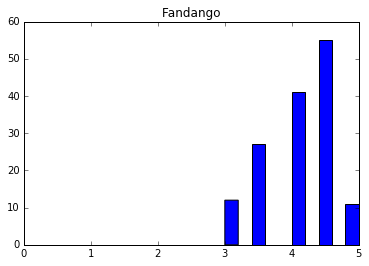

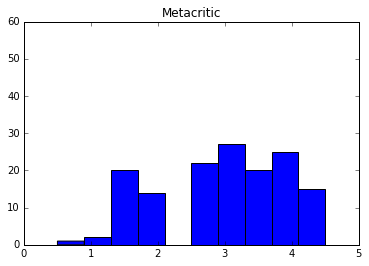

In [3]:
plt.hist(movies["Fandango_Stars"], 10)
plt.title("Fandango")
plt.xlim(0,5)
plt.ylim(0,60)
plt.show()

plt.hist(movies["Metacritic_norm_round"], 10)
plt.title("Metacritic")
plt.xlim(0,5)
plt.ylim(0,60)
plt.show()

# Observations

The most striking feature of the Fandango_Stars histogram is that there are no ratings lower than 3 stars, with the mode of the data at 4.5 stars. This is radically different from the Metacritic scores which range from 0.5 to 4.5. with no noticeable spikes in the histogram (high variance in scores). 

The mean of the Fandango data seems to sit around 4.5 while the mean of the Metacritic data looks to be around 3. On a 5 point scale, that certainly seems like a large difference.

In [4]:
# Calculate some metrics

fs_mean = np.mean(movies["Fandango_Stars"])
mc_mean = np.mean(movies["Metacritic_norm_round"])
fs_median = np.median(movies["Fandango_Stars"])
mc_median = np.median(movies["Metacritic_norm_round"])
fs_std = np.std(movies["Fandango_Stars"])
mc_std = np.std(movies["Metacritic_norm_round"])

print("Fandango Metrics:")
print("Mean:", fs_mean)
print("Median:", fs_median)
print("Standard Deviation:", fs_std)
print("\nMetacritic Metrics:")
print("Mean:", mc_mean)
print("Median:", mc_median)
print("Standard Deviation:", mc_std)

Fandango Metrics:
Mean: 4.089041095890411
Median: 4.0
Standard Deviation: 0.5385321612699531

Metacritic Metrics:
Mean: 2.9726027397260273
Median: 3.0
Standard Deviation: 0.9875610297038636


# Scoring Methodologies

Fandango's scoring is based on user ratings on a 5 star scale with increments of 0.5 stars. Although nothing is specified on their website, FiveThirtyEight (who provided the dataset) noticed in the HTML that values are always rounded up; a movie with a user rating of 4.1 would be rounded up to 4.5. In one instance, a movie with a rating of 4.5 was rounded up to 5 stars. This would certainly boost the values for movies across the board.

Metacritic has a much more sophisticated, or at least complex, methodology for providing a Metascore. Metacritic staff aggregate published reviews (notably from professional reviewers and not users) and either pull a score from the review or assign it based on their impressions of how the reviewer felt if the reviewer did not have a numerical score. Additionally, each reviewer is given a weight depending on reputation, meaning the scores from Roger Ebert will most likely have more weight on the Metascore than a small-name reviewer.

# Looking at Differences

## Median and Mean

For Fandango, we see that the mean (4.089) is higher than the median (4.0) while the opposite is true for Metacritic (mean is 2.973, median is 3.0). Usually, Fandango's mean-median relationship is seen where there are a few very high values pulling the mean above the median. Conversely, the mean would be lower than the median when there are a few very low values pulling it down.

## Standard Deviation

We see that on the same scale, Fandango has a standard deviation of 0.539 while Metacritic has a standard deviation of 0.988. This means that the Fandango scores have less variance and the scores tend to be very similar to each other. In comparison, Metacritic scores cover a much wider range of values and are distributed more evenly. These are most obvious in the histograms above

## Overall

Going back to the means, we see that Fandango's mean is over an entire point higher than that of Metacritic. That alone should point to something fishy in Fandango's scores. Looking at the distribution of the scores, Fandango's upward skew is very clear.

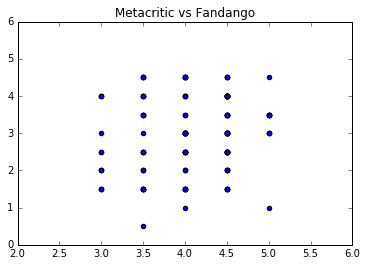

In [5]:
plt.scatter(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
plt.xlim(2,6)
plt.ylim(0,6)
plt.title("Metacritic vs Fandango")

In [6]:
movies["fm_diff"] = movies["Metacritic_norm_round"] - movies["Fandango_Stars"]
movies["fm_diff"] = np.absolute(movies["fm_diff"])
movies = movies.sort_values("fm_diff", axis = 0, ascending = False)

movies[["FILM", "fm_diff", "Fandango_Stars", "Metacritic_norm_round"]].head(5)

,FILM,fm_diff,Fandango_Stars,Metacritic_norm_round
3,Do You Believe? (2015),4.0,5.0,1.0
85,Little Boy (2015),3.0,4.5,1.5
47,Annie (2014),3.0,4.5,1.5
19,Pixels (2015),3.0,4.5,1.5
134,The Longest Ride (2015),3.0,4.5,1.5


In [7]:
from scipy.stats import pearsonr

fm_r = pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
print("r-value:", fm_r[0])

r-value: 0.178449190739


## Low R-Value

The r-value of 0.1785 indicates a fairly weak correlation. In a general sense, this means that the scores on Fandango do not align with those on Metacritic. Given the same movie, knowing one score makes it hard for us to predict the other.

In [8]:
from scipy.stats import linregress

fm_lin = linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
# returns slope, intercept, rvalue, pvalue, stderr

print("slope:", fm_lin[0])
print("intercept:", fm_lin[1])

# If a movie got a 3.0 on Metacritic, what would it get on Fandango?
fandango_3_prediction = (fm_lin[0] * 3.0) + fm_lin[1]

print("If a movie got a 3.0 on Metacritic, we predict its Fandango score to be", fandango_3_prediction)

slope: 0.0973110779739
intercept: 3.7997739189
If a movie got a 3.0 on Metacritic, we predict its Fandango score to be 4.09170715282


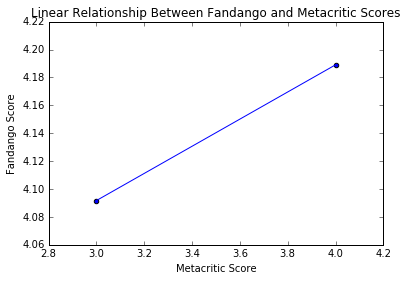

In [9]:
fandango_4_prediction = (fm_lin[0] * 4.0) + fm_lin[1]

plt.scatter([3.0, 4.0], [fandango_3_prediction, fandango_4_prediction])
plt.plot([3.0, 4.0], [fandango_3_prediction, fandango_4_prediction])
plt.xlabel("Metacritic Score")
plt.ylabel("Fandango Score")
plt.title("Linear Relationship Between Fandango and Metacritic Scores")
plt.show()

# Further Analysis

Further work to be done here would be to do the same analysis but with Rotten Tomatoes and IMDB. There may be merit in looking at closely at the scores of large budget films and blockbusters (Marvel movies, franchise films) versus those of smaller budget films and one-off stories (a romantic-comedy or a drama). Perhaps scores are inflated differently based on what kind of film they are, or perhaps Fandango's inflation algorithm is simply one that aggressively rounds up.

As a takeaway, my suggestion is to always check at least two reputable websites when deciding on watching a movie, and to be wary of the score shown on Fandango. If you are buying tickets on Fandango, check the reviews for the movie on another website first.